In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = df.iloc[:,3:13].values

In [5]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
y = df.iloc[:,13].values

In [7]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [8]:
from sklearn.preprocessing import Imputer

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
labelencoder_X_1 = LabelEncoder()

In [11]:
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])

In [12]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [13]:
labelencoder_X_2 = LabelEncoder()

In [14]:
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

In [15]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [16]:
onehotencoder = OneHotEncoder(categorical_features = [1])

In [17]:
X = onehotencoder.fit_transform(X).toarray()

In [18]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [19]:
X = X[:,1:]

In [20]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
#_init_ ANN

In [25]:
classifier = Sequential()

In [26]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim = 11))

In [27]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))

In [28]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [29]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
classifier.fit(X_train,y_train,batch_size=10,epochs= 100)

Epoch 1/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.5040 - acc: 0.7982
Epoch 2/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.4102 - acc: 0.8211
Epoch 3/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3972 - acc: 0.8282
Epoch 4/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3879 - acc: 0.8284
Epoch 5/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3801 - acc: 0.8315
Epoch 6/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3743 - acc: 0.8387
Epoch 7/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3695 - acc: 0.8470
Epoch 8/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3661 - acc: 0.8505
Epoch 9/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3629 - acc: 0.8504
Epoch 10/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3606 - acc: 0.8517
Epoch 11/

8000/8000 [==============================] - 0s 50us/step - loss: 0.3377 - acc: 0.8609
Epoch 84/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3391 - acc: 0.8606
Epoch 85/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3376 - acc: 0.8631
Epoch 86/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3379 - acc: 0.8597
Epoch 87/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3381 - acc: 0.8607
Epoch 88/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3371 - acc: 0.8615
Epoch 89/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3377 - acc: 0.8604
Epoch 90/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3385 - acc: 0.8594
Epoch 91/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3382 - acc: 0.8619
Epoch 92/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3381 - acc: 0.8609
Epoch 93/100


In [31]:
y_pred = classifier.predict(X_test)

In [32]:
df.corr()['Exited']

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

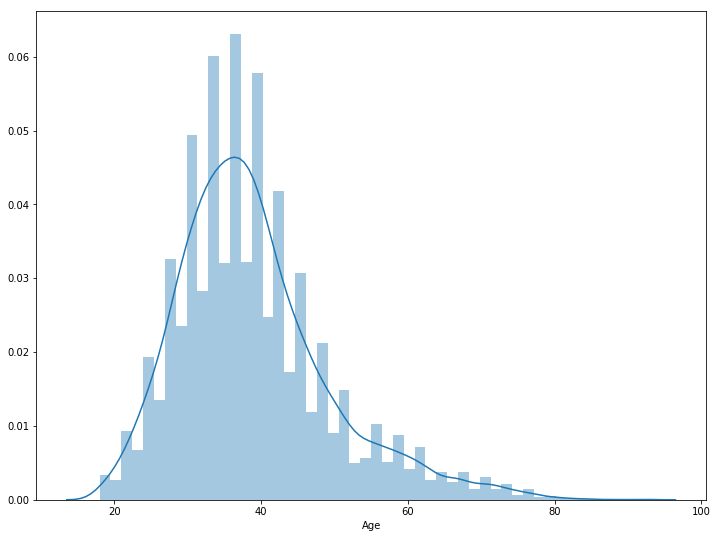

In [33]:
plt.figure(figsize=(12,9))
sns.distplot(df['Age'])

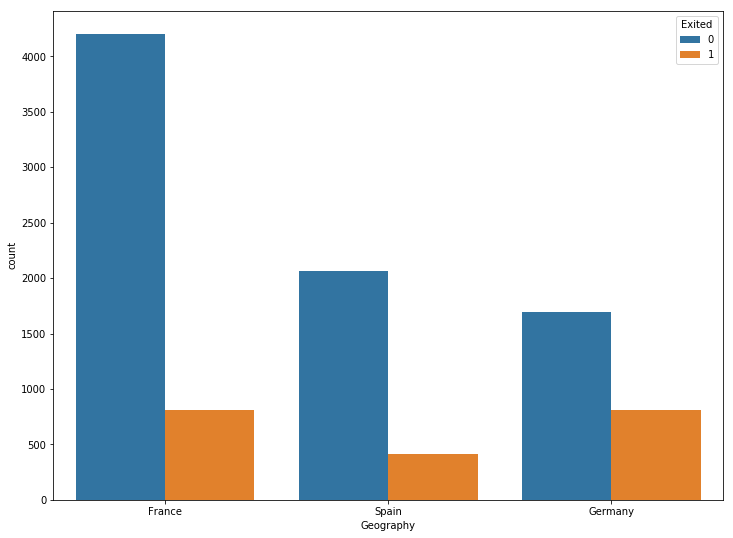

In [34]:
plt.figure(figsize=(12,9))
sns.countplot(x='Geography',hue='Exited',data=df)

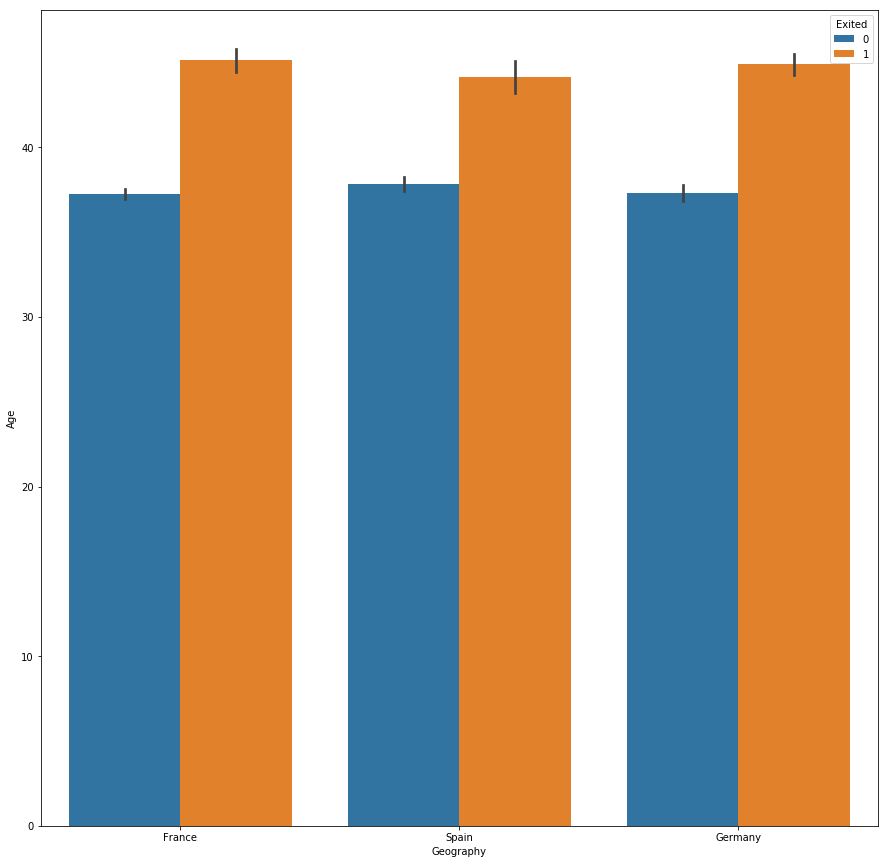

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(x='Geography',y='Age',hue='Exited',data=df)

In [36]:
df['Age'].max()

92

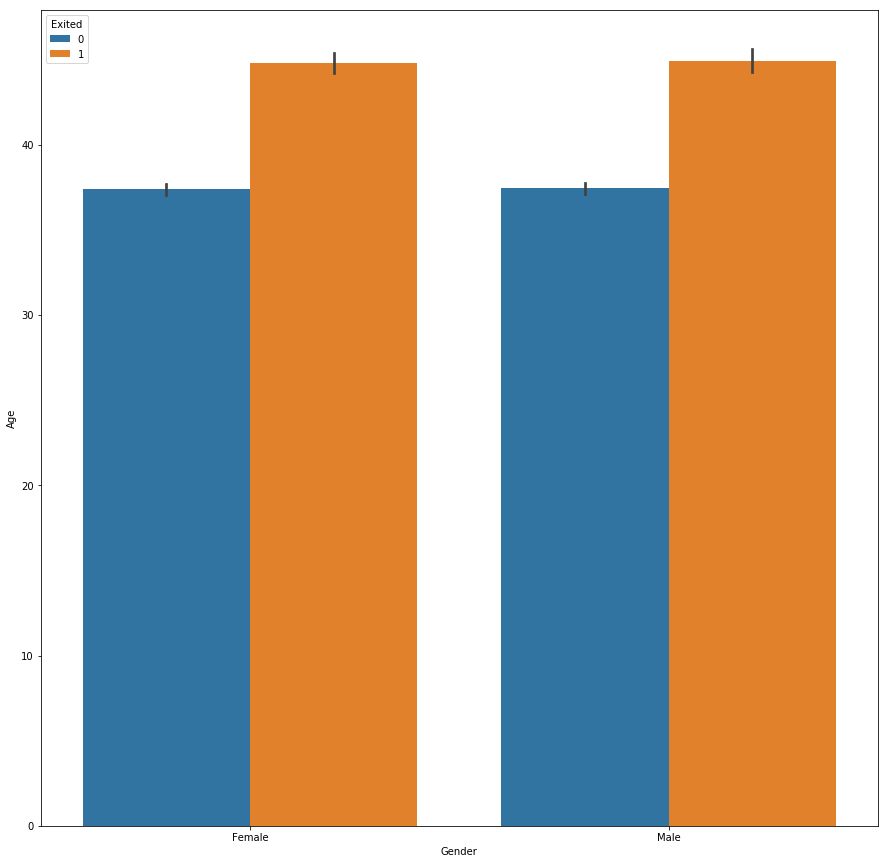

In [37]:
plt.figure(figsize=(15,15))
sns.barplot(x='Gender',y='Age',hue='Exited',data=df)

In [38]:
df['CreditScore'].corr(df['Exited'])

-0.02709353975465779

In [39]:
df['Age'].corr(df['Exited'])

0.28532303783506835

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
y_pred = (y_pred>0.5)

In [42]:
cm = confusion_matrix(y_test,y_pred)

In [43]:
cm

array([[1522,   73],
       [ 209,  196]], dtype=int64)

In [44]:
((1537+153)/2000)

0.845

In [45]:
X1 = X[:,1]==600

In [46]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])